In [1]:
import numpy as np 

In [2]:
import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn.datasets import make_classification

In [3]:
x,y = make_classification(n_samples=1000, n_classes=2, n_features=2, n_informative=2,n_redundant=0, n_repeated=0) 
print (np.unique(y))

[0 1]


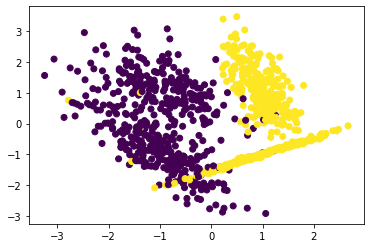

In [4]:
plt.scatter(x[:,0],x[:,1],c=y)

In [5]:
data = np.zeros((x.shape[0],x.shape[1]+1))
data[:,1:] = x
data[:,0] += 1.0

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.20, random_state=42)

In [7]:
print (X_train.shape , y_train.shape)

(800, 3) (800,)


In [8]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-1*z))

def hyp(x , w):
    out = w[0]*x[0] + w[1]*x[1] + w[2]*x[2]
    return sigmoid(out)

def get_error(x,w,y_true):
    
    err = 0.0
    m = x.shape[0]
    for i in range(m):
        if (y_true[i] == 0):
            err = err + (np.log(1 - hyp(x[i] ,w)))
        else:
            err = err + (np.log(hyp(x[i] ,w)))
            
    err = err/m
    return err
    

In [9]:
def get_grad(x , w , y_true):
    grad_0 = 0.0
    grad_1 = 0.0
    grad_2 = 0.0
    
    m  = x.shape[0]
    
    for i in range(m):
        grad_0 = grad_0 + (hyp(x[i],w) - y_true[i])*x[i][0]
        grad_1 = grad_1 + (hyp(x[i],w) - y_true[i])*x[i][1]
        grad_2 = grad_2 + (hyp(x[i],w) - y_true[i])*x[i][2]
    
    grad_0 = grad_0/m
    grad_1 = grad_1/m
    grad_2 = grad_2/m
    
    return [grad_0, grad_1, grad_2]
    

In [10]:
def gradient_descent(x , w , y_true , lr = 0.1):
    
    error = get_error(x ,w , y_true)
    [grad_0 , grad_1 , grad_2] = get_grad(x , w , y_true)
    
    w[0] = w[0] - lr*grad_0
    w[1] = w[1] - lr*grad_1
    w[2] = w[2] - lr*grad_2
    
    return error , w 


In [17]:
w = np.array([0.0,0.0,0.0])
loss = []
max_iters = 500
import time 
from IPython.display import clear_output
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]

def predict(x_sample , w):
    conf  = hyp(x_sample , w)
    if conf >= 0.5:
        return 1 
    else:
        return 0 

def get_probs(x , w):
    y_probs = []
    for i in range(x.shape[0]):
        y_probs.append(hyp(x[i],w))
    y_probs = np.array(y_probs)
    
    return y_probs

def get_accuracy(x , y , w):
    y_pred = []
    for i in range(x.shape[0]):
        y_pred.append(predict(x[i],w))
    y_pred = np.array(y_pred)
    
    return float((y_pred == y).sum())*100/y.shape[0], y_pred

 the param values are [-0.09817803  3.14884209  0.17081209]


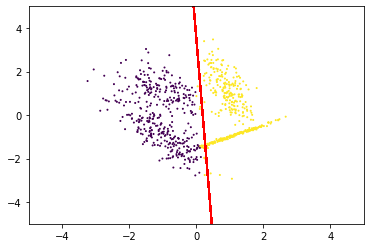

In [18]:
import time 

for i in range(max_iters):
    er , W = gradient_descent(X_train, w, y_train , lr = 0.1)
    loss.append(-1*er)
    
    acc , y_pred = get_accuracy(X_train , y_train , W)
    print (" the param values are", W)
    probs = get_probs(X_train , W)
    #plt.contour(X_train[:,1],X_train[:,2], probs, levels=[.5], cmap="Greys")
    y_plt = (0.5 - W[0]*1 - W[1]*X_train[:,1])/W[2]
    plt.plot(X_train[:,1], y_plt,'r')
    plt.scatter(X_train[:,1] , X_train[:,2],c=y_pred,s=1)
    plt.ylim([-5.0, 5.0])
    plt.xlim([-5.0, 5.0])
    plt.show()
    time.sleep(0.1)
    clear_output(wait=True)
    


94.75 92.5


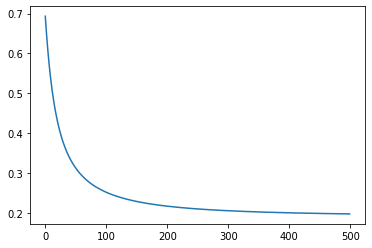

In [19]:
train_acc,y = get_accuracy(X_train , y_train ,w)
test_acc,y = get_accuracy(X_test , y_test ,w)

print (train_acc , test_acc)

plt.plot(loss)
plt.show()